In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [3]:
len(train_data)

159571

In [4]:
len(test_data)

153164

<AxesSubplot:>

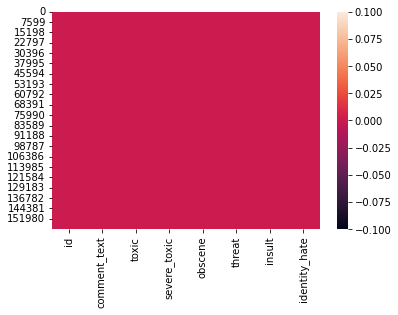

In [5]:
sns.heatmap(train_data.isna())

<AxesSubplot:>

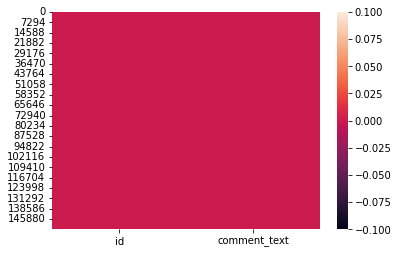

In [6]:
sns.heatmap(test_data.isna())

In [7]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
pd.options.display.max_colwidth=500
train_data.comment_text[0:5]

0                                                                                                                                                                                                                                              Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                                                                                                                       D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2

In [10]:
train_data['text'] = train_data.comment_text.apply(lambda x: x.replace('\n', ' '))
test_data['text'] = test_data.comment_text.apply(lambda x: x.replace('\n', ' '))

In [11]:
cats = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_prepared_data = []

def format_text_spacy(text):
    return (text.text, {'cats': {cat: text[cat] for cat in cats}})
    
for i in range(0,len(train_data)):
    text = train_data.iloc[i]
    train_prepared_data.append(format_text_spacy(text))

In [24]:
train_prepared_data[40:45]

[('"  Sure, but the lead must briefly summarize Armenia\'s history. I simply added what I found necessary. If anyone thinks this or that sentence is redundant for the lead, they are welcome to remove make edits.  talk  "',
  {'cats': {'toxic': 0,
    'severe_toxic': 0,
    'obscene': 0,
    'threat': 0,
    'insult': 0,
    'identity_hate': 0}}),
 ("TFD   I think we just eced. I think we responded to each other without seeing each others responses. I added something in response to yours, but don't know if you saw mine. (T/C//WP:CHICAGO/WP:FOUR)",
  {'cats': {'toxic': 0,
    'severe_toxic': 0,
    'obscene': 0,
    'threat': 0,
    'insult': 0,
    'identity_hate': 0}}),
 ("You are gay or antisemmitian?   Archangel WHite Tiger  Meow! Greetingshhh!  Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...  1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!  2 - If 